<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/3.%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%ED%99%9C%EC%9A%A9_%EC%9D%80%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

캐글 데이터로 연습해보자.

출처 : https://www.kaggle.com/christianlillelund/passenger-list-for-the-estonia-ferry-disaster

# Introduction

On September 27 1994 the ferry Estonia set sail on a night voyage across the Baltic Sea from the port of Tallin in Estonia to Stockholm. She departed at 19.00 carrying 989 passengers and crew, as well as vehicles, and was due to dock at 09.30 the following morning, Tragically, the Estonia never arrived.

The weather was typically stormy for the time of year but, like all the other scheduled ferries on that day, the Estonia set off as usual. At roughly 01:00 a worrying sound of screeching metal was heard, but an immediate inspection of the bow visor showed nothing untoward. The ship suddenly listed 15 minutes later and soon alarms were sounding, including the lifeboat alarm. Shortly afterwards the Estonia rolled drastically to starboard. Those who had reached the decks had a chance of survival but those who had not were doomed as the angled corridors had become death traps. A Mayday signal was sent but power failure meant the ship’s position was given imprecisely. The Estonia disappeared from the responding ships’ radar screens at about 01:50.

The Marietta arrived at the scene at 02:12 and the first helicopter at 03:05. Of the 138 people rescued alive, one died later in hospital.

Of the 310 people who had reached the decks, almost a third died of hypothermia. The final death toll was shockingly high – more than 850 people.

An official inquiry found that failure of the locks on the bow visor, which broke away under the punishing waves, caused water to flood the car deck and quickly capsize the ship. The report also noted a lack of action, delay in sounding the alarm, lack of guidance from the bridge and a failure to light distress flares.

The sinking of the Estonia was Europe’s worst postwar maritime disaster.

Read more: https://en.wikipedia.org/wiki/MS_Estonia



# Facts

When was the Sinking of the Estonia: September 28, 1994
Where was the Sinking of the Estonia: Near the Turku Archipelago, in the Baltic Sea
What was the Sinking of the Estonia death toll: 852 passengers and crew

Interesting things to investigate about the data:

Who's more likely to survive the sinking based on data?
Is age an indicator for survival?
Is gender an indicator for survival?
Did the crew aboard have a higher chance of survival than passengers?
Since the death toll is well above 80%, can you make a classifier that beats the baseline (all passengers died)?


# Data Dictionary

|Variable|Definition|Key|
|--------|----------|---|
|Country|Country of origin||	
|Firstname|Firstname of passenger||	
|Lastname|Lastname of passenger||	
|Sex|Gender of passenger|M = Male, F = Female|
|Age|Age of passenger at the time of sinking||	
|Category|The type of passenger|C = Crew, P = Passenger|
|Survived|Survival|0 = No, 1 = Yes|


![](https://cdn.prod.www.spiegel.de/images/d0eed47d-0001-0005-0000-000001064832.gif)

![](https://www.vragguiden.dk/ThumbImage.aspx?sid=108&width=710)

![](https://www.vragguiden.dk/wreckimages/113.jpg)

In [138]:
import pandas as pd
import numpy as np

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns

import matplotlib.pyplot as plt

In [139]:
data = pd.read_csv('drive/My Drive/데이터/estonia-passenger-list.csv')
print(len(data))
data.head()

989


,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [140]:
data.isna().sum()

PassengerId    0
Country        0
Firstname      0
Lastname       0
Sex            0
Age            0
Category       0
Survived       0
dtype: int64

# PassengerId column

In [141]:
data = data.drop(['PassengerId'], axis=1)
data.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,Estonia,LEA,AALISTE,F,22,C,0
2,Estonia,AIRI,AAVASTE,F,21,C,0
3,Sweden,JURI,AAVIK,M,53,C,0
4,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


# Country column

In [142]:
data['Country'].value_counts()

Sweden           550
Estonia          344
Latvia            28
Finland           16
Russia            14
Norway             9
Germany            8
Denmark            6
Lithuania          4
Netherlands        2
Morocco            2
Great Britain      2
Canada             1
France             1
Nigeria            1
Belarus            1
Name: Country, dtype: int64

In [143]:
country = data['Country'].value_counts().index.tolist()
values = data['Country'].value_counts().tolist()

labels={'x': 'Country', 
        'y': 'Passenger Count'}

fig = px.bar(
    x=country,
    y=values,
    title="Passengers by Country",
    labels=labels,
    color=values)
fig.show()

# Name column

In [144]:
data['Lastname'].value_counts()

ANDERSSON    15
NILSSON      12
ERIKSSON     11
JOHANSSON     9
KARLSSON      9
             ..
JOA           1
OUN           1
CALAMNIUS     1
JIBREUS       1
ROSMAN        1
Name: Lastname, Length: 774, dtype: int64

In [145]:
data['Lastname'].value_counts()[:10]

ANDERSSON     15
NILSSON       12
ERIKSSON      11
JOHANSSON      9
KARLSSON       9
PERSSON        8
GUSTAFSSON     8
SVENSSON       8
JONSSON        6
PETTERSSON     6
Name: Lastname, dtype: int64

In [146]:
name = data['Lastname'].value_counts().index.tolist()[:10]
values = data['Lastname'].value_counts().tolist()[:10]

labels={'x': 'Lastname', 
        'y': 'Passenger Count'}

fig = px.bar(
    x=name,
    y=values,
    title="10 Most Popular Last Names",
    labels=labels,
    color=values)
fig.show()

# Sex column

In [147]:
data[data['Sex'] == 'M'].count().max()

503

In [148]:
sex = ['M', 'F']
values = data[data['Sex'] == 'M'].count().max(), data[data['Sex'] == 'F'].count().max()

labels={'x': 'Sex', 
        'y': 'Passenger Count'}

fig = px.pie(
    names=sex,
    values=values,
    title="Gender Distribution among Passengers",
    labels=labels,
    color_discrete_sequence=['Blue', 'Red'])
fig.show()

# Age column

# Age column

In [149]:
male_ages = data[data['Sex']=='M']['Age'].tolist()
female_ages = data[data['Sex']=='F']['Age'].tolist()

fig = ff.create_distplot(
    hist_data=[male_ages, female_ages],
    group_labels=['M', 'F'],
    colors=['#1500ff', '#ff00e1'],
    show_hist=False,
    show_rug=False)

fig.layout.update({'title':f'Age Distribution of both Genders<br>[Average Age: {np.mean(male_ages+female_ages):.2f} years]'})
fig.show()

# 	Category column

In [150]:
data['Category'].unique()

array(['P', 'C'], dtype=object)

In [151]:
names = ['Passengers', 'Crew Members']
values = [data[data['Category']=='P'].count().max(), data[data['Category']=='C'].count().max()]

fig = px.pie(
    names=names,
    values=values,
    hole =0.5,
    title = 'Crew members vs Passengers',
    color_discrete_sequence=['Red', 'Blue']
)
fig.show()

# Survived column

In [152]:
values = [data[data['Survived']==0].count().max(), data[data['Survived']==1].count().max()]
names = ['Dead', 'Survived']

fig = px.pie(
    names = names,
    values=values,
    hole=0.5,
    title='How many Survived?',
    color_discrete_sequence=['Black', 'Green']
)
fig.show()

여기까지 했는데 은성이가 한 것을 봐버렸다. EDA를 더 하면 겹칠 것 같아서 은성이 링크를 남기고

Survived를 맞추는 분류 문제를 구성할 경우. 비율이 86.1 : 13.9 로 Imbalanced data가 예상된다.

난 Highly-imbalanced data에 대해서 서술해보겠다.

은성이 코드 : https://erin-study.tistory.com/2

Highly-imbalanced data : https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/

# 비대칭 데이터 문제

데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

이렇게 각 클래스에 속한 데이터의 갯수의 차이에 의해 발생하는 문제들을 비대칭 데이터 문제(imbalanced data problem)이라고 한다.

일단 비대칭 데이터라는 것을 생각 안하고 해보자.

In [153]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random

In [154]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [155]:
torch.manual_seed(1)

Age_band라는 새로운 변수에 Age변수를 그룹화하여 값을 넣는다.

 

▶ Age 변수는 int변수이지만 다른 변수에 비해 값이 두드러지므로 10대별로 구간을 나눈다.

In [156]:
# 0세~19세의 빈도수가 낮아 총 10대라고 포함

data['Age_band'] = 0
data.loc[(data['Age']<=19), 'Age_band'] = 0
data.loc[(data['Age']>19)&(data['Age']<=29), 'Age_band'] = 1
data.loc[(data['Age']>29)&(data['Age']<=39), 'Age_band'] = 2
data.loc[(data['Age']>39)&(data['Age']<=49), 'Age_band'] = 3
data.loc[(data['Age']>49)&(data['Age']<=59), 'Age_band'] = 4
data.loc[(data['Age']>59)&(data['Age']<=69), 'Age_band'] = 5
data.loc[(data['Age']>69)&(data['Age']<=79), 'Age_band'] = 6
data.loc[(data['Age']>79)&(data['Age']<=89), 'Age_band'] = 7

data.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age_band
0,Sweden,ARVID KALLE,AADLI,M,62,P,0,5
1,Estonia,LEA,AALISTE,F,22,C,0,1
2,Estonia,AIRI,AAVASTE,F,21,C,0,1
3,Sweden,JURI,AAVIK,M,53,C,0,4
4,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,4


Country_band라는 새로운 변수에 Country변수를 그룹화하여 값을 넣는다.

 

▶ Country 변수는 상위 2개의 나라가 약 90%를 차지하므로 그 외의 나라는 others로 간주하여 다른 클래스로 분류한다.

In [157]:
for i in range(len(data['Country'])):
  if data.loc[i, 'Country'] == 'Sweden':
    data.loc[i, 'Country_band'] = 0
  elif data.loc[i, 'Country'] == 'Estonia':
    data.loc[i, 'Country_band'] = 1
  else:
    data.loc[i, 'Country_band'] = 2

data.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age_band,Country_band
0,Sweden,ARVID KALLE,AADLI,M,62,P,0,5,0.0
1,Estonia,LEA,AALISTE,F,22,C,0,1,1.0
2,Estonia,AIRI,AAVASTE,F,21,C,0,1,1.0
3,Sweden,JURI,AAVIK,M,53,C,0,4,0.0
4,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0,4,0.0


In [158]:
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)
data.head()

,Country,Firstname,Lastname,Sex,Age,Category,Survived,Age_band,Country_band
0,Sweden,ARVID KALLE,AADLI,1,62,P,0,5,0.0
1,Estonia,LEA,AALISTE,0,22,C,0,1,1.0
2,Estonia,AIRI,AAVASTE,0,21,C,0,1,1.0
3,Sweden,JURI,AAVIK,1,53,C,0,4,0.0
4,Sweden,BRITTA ELISABET,AHLSTROM,0,55,P,0,4,0.0


In [159]:
x = data[['Sex', 'Age_band', 'Country_band']].values
y = data[['Survived']].values

print(x.shape, y.shape)

(989, 3) (989, 1)


In [160]:
class MyDataset(Dataset):
  # 데이터셋의 전처리를 해주는 부분
  def __init__(self):
    self.x_data = torch.FloatTensor(x)
    self.y_data = torch.FloatTensor(y)
    
  # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
  def __len__(self):
    return len(self.x_data)
  
  # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [161]:
dataset = MyDataset()

In [162]:
train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

791 198
791 198


In [163]:
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=len(val_dataset), shuffle=True)

In [164]:
class BinaryClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [165]:
model = BinaryClassifier()

In [166]:
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [167]:
nb_epochs = 200

train_losses = []
val_losses = []

for epoch in range(nb_epochs + 1):
  for x_train, y_train in train_loader:

    # H(x) 계산
    train_hypothesis = model(x_train)
 
    # cost 계산
    cost = F.binary_cross_entropy(train_hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    train_losses.append(cost.item())

    if epoch % (nb_epochs/10) == 0:
      print(f'Epoch : {epoch}/{nb_epochs}')
      print(f'Trin Cost : {cost.item()}')
    
  for x_val, y_val in val_loader:
    val_hypothesis = model(x_val)
    cost = F.binary_cross_entropy(val_hypothesis, y_val)
    val_losses.append(cost.item())
    if epoch % (nb_epochs/10) == 0:
      print(f'Validation Cost : {cost.item()}')
      print('-'*50)

val_prediction = val_hypothesis >= torch.FloatTensor([0.5])
val_correct_prediction = val_prediction.float() == y_val
val_accuracy = val_correct_prediction.sum().item() / len(val_correct_prediction)
print(f'Validation Accuracy : {val_accuracy * 100}%')
      


Epoch : 0/200
Trin Cost : 0.5131803154945374
Validation Cost : 0.5174912810325623
--------------------------------------------------
Epoch : 20/200
Trin Cost : 0.48114529252052307
Validation Cost : 0.49034640192985535
--------------------------------------------------
Epoch : 40/200
Trin Cost : 0.45990994572639465
Validation Cost : 0.47293350100517273
--------------------------------------------------
Epoch : 60/200
Trin Cost : 0.4451746940612793
Validation Cost : 0.46128129959106445
--------------------------------------------------
Epoch : 80/200
Trin Cost : 0.4345739781856537
Validation Cost : 0.45322781801223755
--------------------------------------------------
Epoch : 100/200
Trin Cost : 0.4267234802246094
Validation Cost : 0.4475208520889282
--------------------------------------------------
Epoch : 120/200
Trin Cost : 0.42076927423477173
Validation Cost : 0.4433972239494324
--------------------------------------------------
Epoch : 140/200
Trin Cost : 0.4161621928215027
Validat

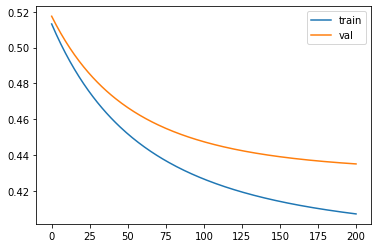

In [168]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

여기까지가 비대칭 데이터를 고려하지 않고 풀어본 문제다.

아래는 label 값이 Survived의 비율을 나타낸다.

In [169]:
data['Survived'].value_counts()

0    852
1    137
Name: Survived, dtype: int64

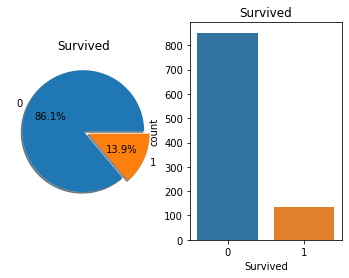

In [170]:
f, ax = plt.subplots(1, 2)
data['Survived'].value_counts().plot.pie(explode=[0, 0.1],
                                         autopct='%1.1f%%', 
                                         shadow=True, ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

죽은 사람이 86%, 산 사람이 14%기 때문에, 이 모델은 다 죽었다고 해도 86%의 정확도를 가질 수 있다.

# 비대칭 데이터 해결 방법

비대칭 데이터는 다수 클래스 데이터에서 일부만 사용하는 언더 샘플링이나 소수 클래스 데이터를 증가시키는 오버 샘플링을 사용하여 데이터 비율을 맞추면 정밀도(precision)가 향상된다.

* 오버샘플링(Over-Sampling)
* 언더샘플링(Under-Sampling)
* 복합샘플링(Combining Over-and Under-Sampling)


In [202]:
x = data[['Sex', 'Age_band', 'Country_band']].values
y = data[['Survived']].values

print(x.shape, y.shape)

(989, 3) (989, 1)


In [203]:
print(f'산 사람 : {np.count_nonzero(y)} 죽은 사람 : {len(y)-np.count_nonzero(y)}')

산 사람 : 137 죽은 사람 : 852


In [204]:
from imblearn.under_sampling import * # 언더샘플링
from imblearn.over_sampling import * # 오버샘플링
from imblearn.combine import * # 복합샘플링

# Ramdom Under-Sampler

무작위로 데이터를 없애는 단순 샘플링

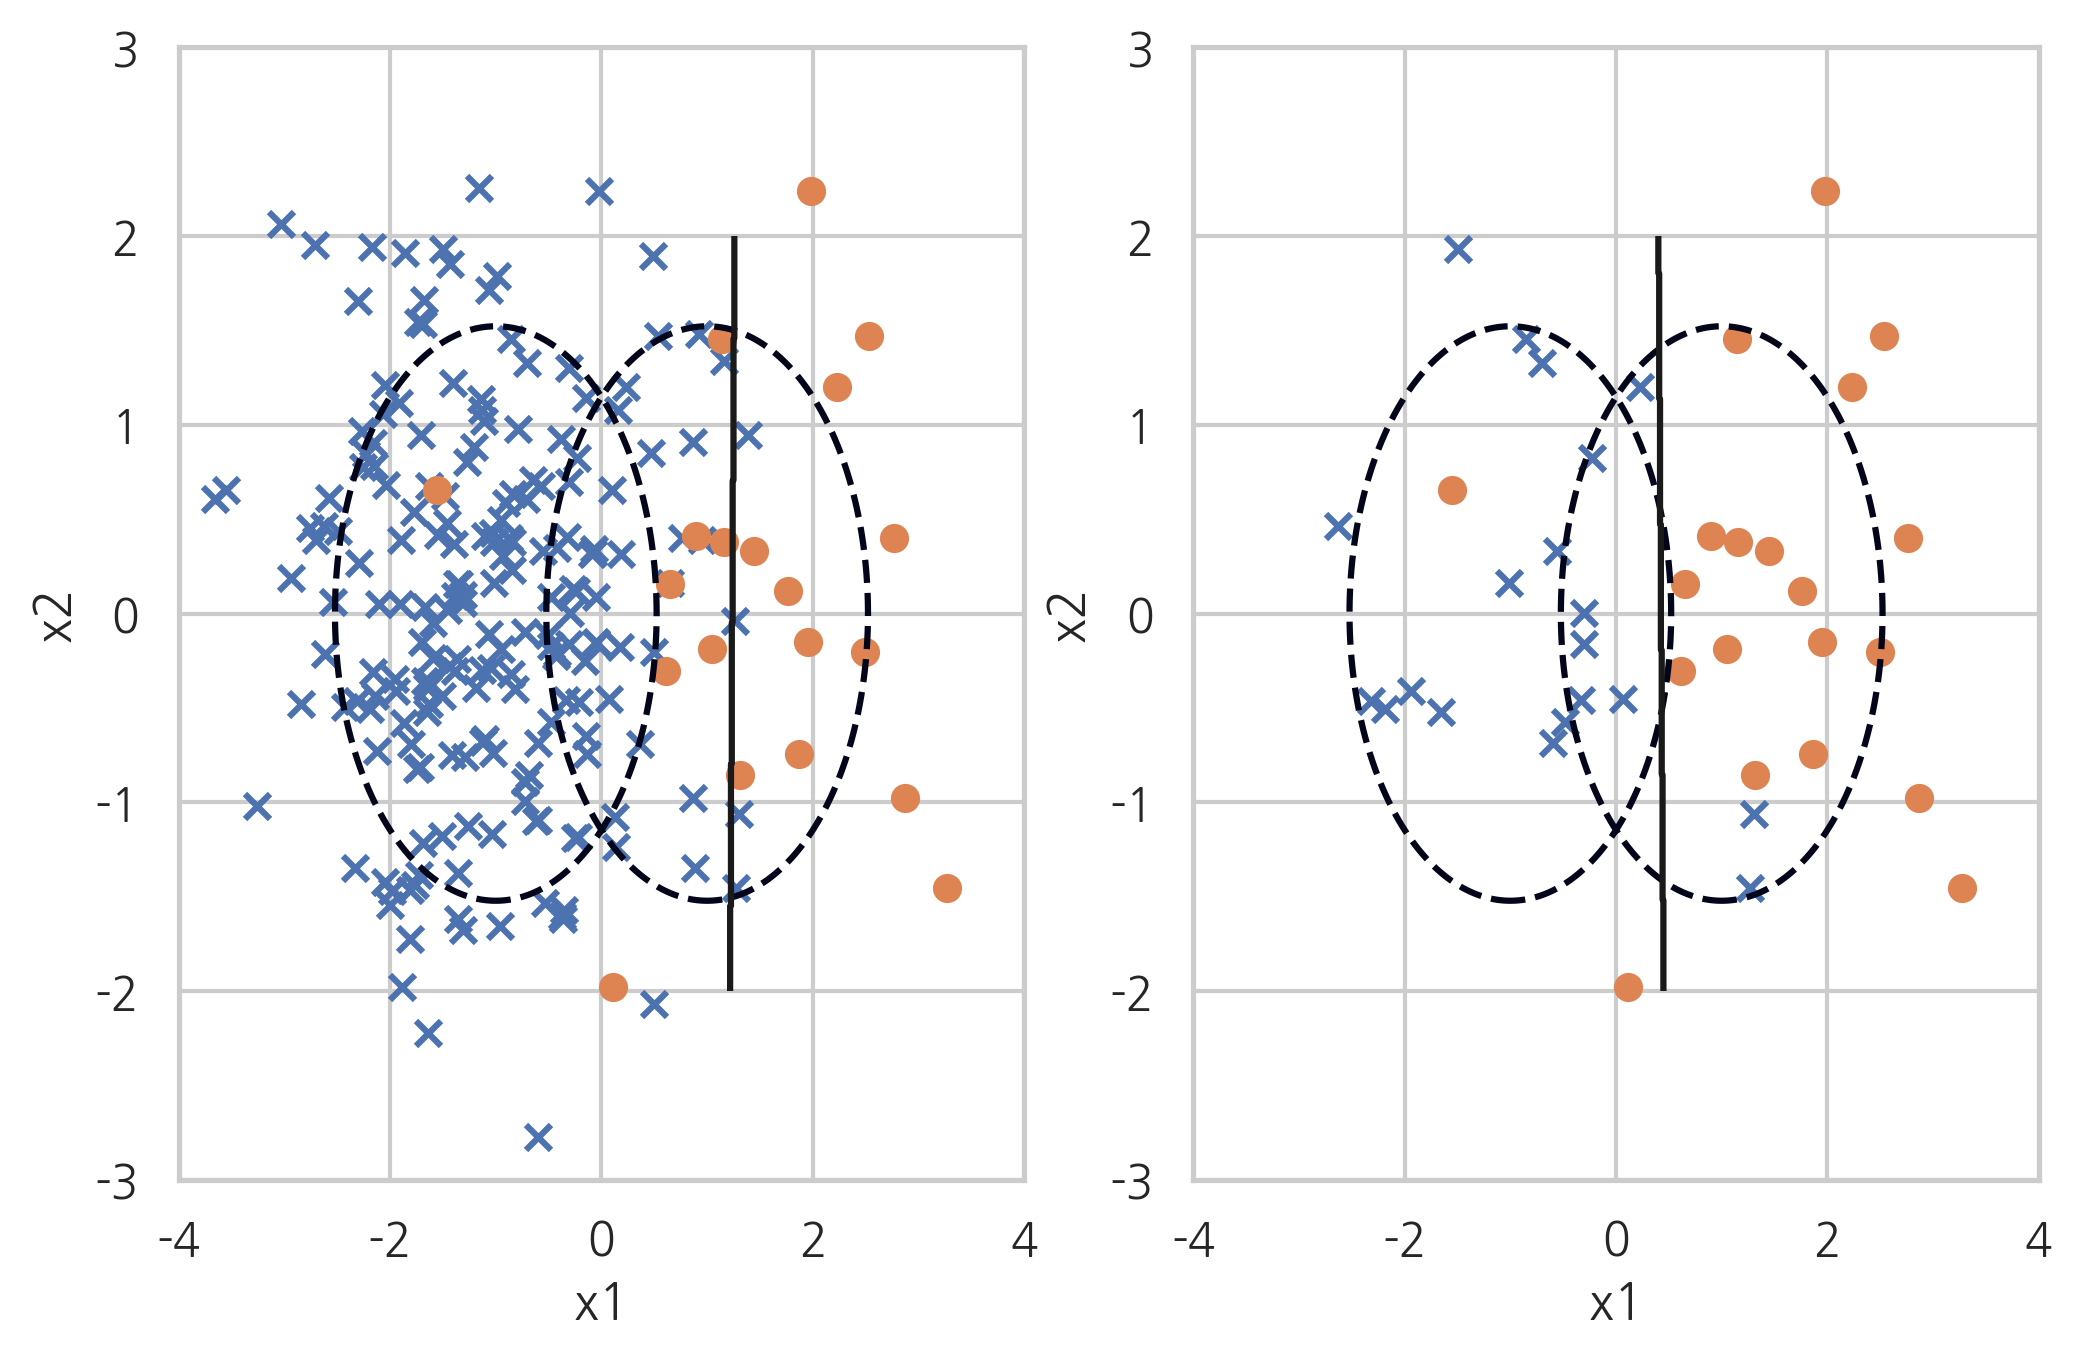

In [205]:
x, y = RandomUnderSampler(random_state=0).fit_sample(x, y)
print(x.shape, y.shape)

(274, 3) (274, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [206]:
print(f'산 사람 : {np.count_nonzero(y)} 죽은 사람 : {len(y)-np.count_nonzero(y)}')

산 사람 : 137 죽은 사람 : 137


In [207]:
class MyDataset(Dataset):
  # 데이터셋의 전처리를 해주는 부분
  def __init__(self):
    self.x_data = torch.FloatTensor(x)
    self.y_data = torch.FloatTensor(y)
    
  # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
  def __len__(self):
    return len(self.x_data)
  
  # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
  def __getitem__(self, idx):
    x = self.x_data[idx]
    y = self.y_data[idx]
    return x, y

In [208]:
dataset = MyDataset()

In [209]:
train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

219 55
219 55


In [210]:
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=len(val_dataset), shuffle=True)

In [211]:
class BinaryClassifier(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(3, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    return self.sigmoid(self.linear(x))

In [212]:
model = BinaryClassifier()

In [213]:
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [214]:
nb_epochs = 200

train_losses = []
val_losses = []

for epoch in range(nb_epochs + 1):
  for x_train, y_train in train_loader:

    # H(x) 계산
    train_hypothesis = model(x_train)
 
    # cost 계산
    cost = F.binary_cross_entropy(train_hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    train_losses.append(cost.item())

    if epoch % (nb_epochs/10) == 0:
      print(f'Epoch : {epoch}/{nb_epochs}')
      print(f'Trin Cost : {cost.item()}')
    
  for x_val, y_val in val_loader:
    val_hypothesis = model(x_val)
    cost = F.binary_cross_entropy(val_hypothesis, y_val)
    val_losses.append(cost.item())
    if epoch % (nb_epochs/10) == 0:
      print(f'Validation Cost : {cost.item()}')
      print('-'*50)

val_prediction = val_hypothesis >= torch.FloatTensor([0.5])
val_correct_prediction = val_prediction.float() == y_val
val_accuracy = val_correct_prediction.sum().item() / len(val_correct_prediction)
print(f'Validation Accuracy : {val_accuracy * 100}%')
      

Epoch : 0/200
Trin Cost : 0.6776736378669739
Validation Cost : 0.6878156661987305
--------------------------------------------------
Epoch : 20/200
Trin Cost : 0.6588205695152283
Validation Cost : 0.6706239581108093
--------------------------------------------------
Epoch : 40/200
Trin Cost : 0.6474354267120361
Validation Cost : 0.6597134470939636
--------------------------------------------------
Epoch : 60/200
Trin Cost : 0.6404700875282288
Validation Cost : 0.6526290774345398
--------------------------------------------------
Epoch : 80/200
Trin Cost : 0.6361246109008789
Validation Cost : 0.6478903889656067
--------------------------------------------------
Epoch : 100/200
Trin Cost : 0.6333431005477905
Validation Cost : 0.6446084380149841
--------------------------------------------------
Epoch : 120/200
Trin Cost : 0.6315034627914429
Validation Cost : 0.6422448754310608
--------------------------------------------------
Epoch : 140/200
Trin Cost : 0.6302370429039001
Validation Cos

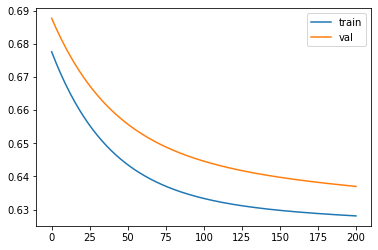

In [215]:
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.legend()
plt.show()

Random Under-Sampling 외에도 많은 샘플링 기법이 있다.

라이브러리로 지원해주기 때문에 하나하나 할 필요는 없을 것 같고,

링크 첨부한다. 

https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/#%EC%96%B8%EB%8D%94-%EC%83%98%ED%94%8C%EB%A7%81